# __EDA - Ogólna analiza zbioru__

## _importy / definicje_

Importy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Zbiór danych

In [56]:
df = pd.read_csv('../repo/loan_data.csv')
df['loan_status'] = df['loan_status'].astype(object)
df.sample(5)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
35448,23.0,female,Associate,35331.0,0,RENT,8492.0,DEBTCONSOLIDATION,7.84,0.24,3.0,550,Yes,0
8189,23.0,male,High School,68290.0,3,MORTGAGE,5500.0,DEBTCONSOLIDATION,7.51,0.08,4.0,587,Yes,0
24012,33.0,male,Associate,35824.0,13,RENT,10000.0,VENTURE,13.06,0.28,9.0,657,No,1
7185,23.0,female,Associate,63221.0,2,OWN,6000.0,EDUCATION,11.01,0.09,3.0,616,No,0
37719,24.0,female,Associate,144971.0,0,MORTGAGE,3727.0,VENTURE,8.55,0.03,3.0,628,Yes,0


Użyteczne funkcje

## Struktura zbioru
Rozmiar zbioru: _45000 wierszy_ __x__ _14 kolumn_

Cechy:
* person_age 
* person_gender
* person_education
* person_income
* person_emp_exp
* person_home_ownership
* loan_amnt
* loan_intent
* loan_int_rate
* loan_percent_income
* cb_person_cred_hist_length
* credit_score
* previous_loan_defaults_on_file
* __loan_status__ _(cecha docelowa)_

In [55]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

None

## Kategorie cech
~ _Numeryczne_: 
- person_age, 
- person_income
- person_emp_exp 
- loan_amnt 
- loan_int_rate
- loan_percent_income
- cb_person_cred_hist_length
- credit_score 

~ _Kategoryczne_:
- person_gender
- person_education
- person_home_ownership
- loan_intent

~ _Logiczne_ :
- previous_loan_defaults_on_file
- loan_status

In [53]:
data_struct = {
    'Numerical':['person_age', 'person_income', 'person_emp_exp', 
                 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 
                 'cb_person_cred_hist_length', 'credit_score'],
    'Categorical':['person_gender', 'person_education', 'person_home_ownership', 'loan_intent'],
    'Logical':['previous_loan_defaults_on_file', 'loan_status']
}

## Rozkłady wartości

### 1. Wartości numeryczne

In [37]:
df_desc_num = df[data_struct['Numerical']].describe()
df_desc_num.loc['missing'] = df.isna().sum()
df_desc_num.loc['unique'] = df.nunique()
df_desc_num = df_desc_num.rename({
    '25%' : 'Q1',
    '50%' : 'median',
    '75%' : 'Q3'
})
df_desc_num = df_desc_num.reindex(['count', 'missing', 'unique', 'mean', 'min', 'Q1', 'median', 'Q3', 'max', 'std'])
df_desc_num.T

,count,missing,unique,mean,min,Q1,median,Q3,max,std
person_age,45000.0,0.0,60.0,27.764178,20.00,24.00,26.00,30.00,144.00,6.045108
person_income,45000.0,0.0,33989.0,80319.053222,8000.00,47204.00,67048.00,95789.25,7200766.00,80422.498632
person_emp_exp,45000.0,0.0,63.0,5.410333,0.00,1.00,4.00,8.00,125.00,6.063532
loan_amnt,45000.0,0.0,4483.0,9583.157556,500.00,5000.00,8000.00,12237.25,35000.00,6314.886691
loan_int_rate,45000.0,0.0,1302.0,11.006606,5.42,8.59,11.01,12.99,20.00,2.978808
loan_percent_income,45000.0,0.0,64.0,0.139725,0.00,0.07,0.12,0.19,0.66,0.087212
cb_person_cred_hist_length,45000.0,0.0,29.0,5.867489,2.00,3.00,4.00,8.00,30.00,3.879702
credit_score,45000.0,0.0,340.0,632.608756,390.00,601.00,640.00,670.00,850.00,50.435865


### 2. Wartości nienumeryczne

In [70]:
cols = data_struct['Categorical'] + data_struct['Logical']

df_desc_non_num = df[cols].describe()
df_desc_non_num.loc['missing'] = df[cols].isna().sum()
df_desc_non_num.loc['unique_vals'] = df[cols].apply(lambda col: list(col.unique()))
df_desc_non_num = df_desc_non_num.rename({
    'freq' : 'top_freq',
    'unique' : 'unique_count',
})
df_desc_non_num = df_desc_non_num.reindex(['count', 'missing', 'unique_count', 'unique_vals', 'top', 'top_freq'])
df_desc_non_num.T

,count,missing,unique_count,unique_vals,top,top_freq
person_gender,45000,0,2,"[female, male]",male,24841
person_education,45000,0,5,"[Master, High School, Bachelor, Associate, Doc...",Bachelor,13399
person_home_ownership,45000,0,4,"[RENT, OWN, MORTGAGE, OTHER]",RENT,23443
loan_intent,45000,0,6,"[PERSONAL, EDUCATION, MEDICAL, VENTURE, HOMEIM...",EDUCATION,9153
previous_loan_defaults_on_file,45000,0,2,"[No, Yes]",Yes,22858
loan_status,45000,0,2,"[1, 0]",0,35000


## Wykresy

### 1. Wartości numeryczne

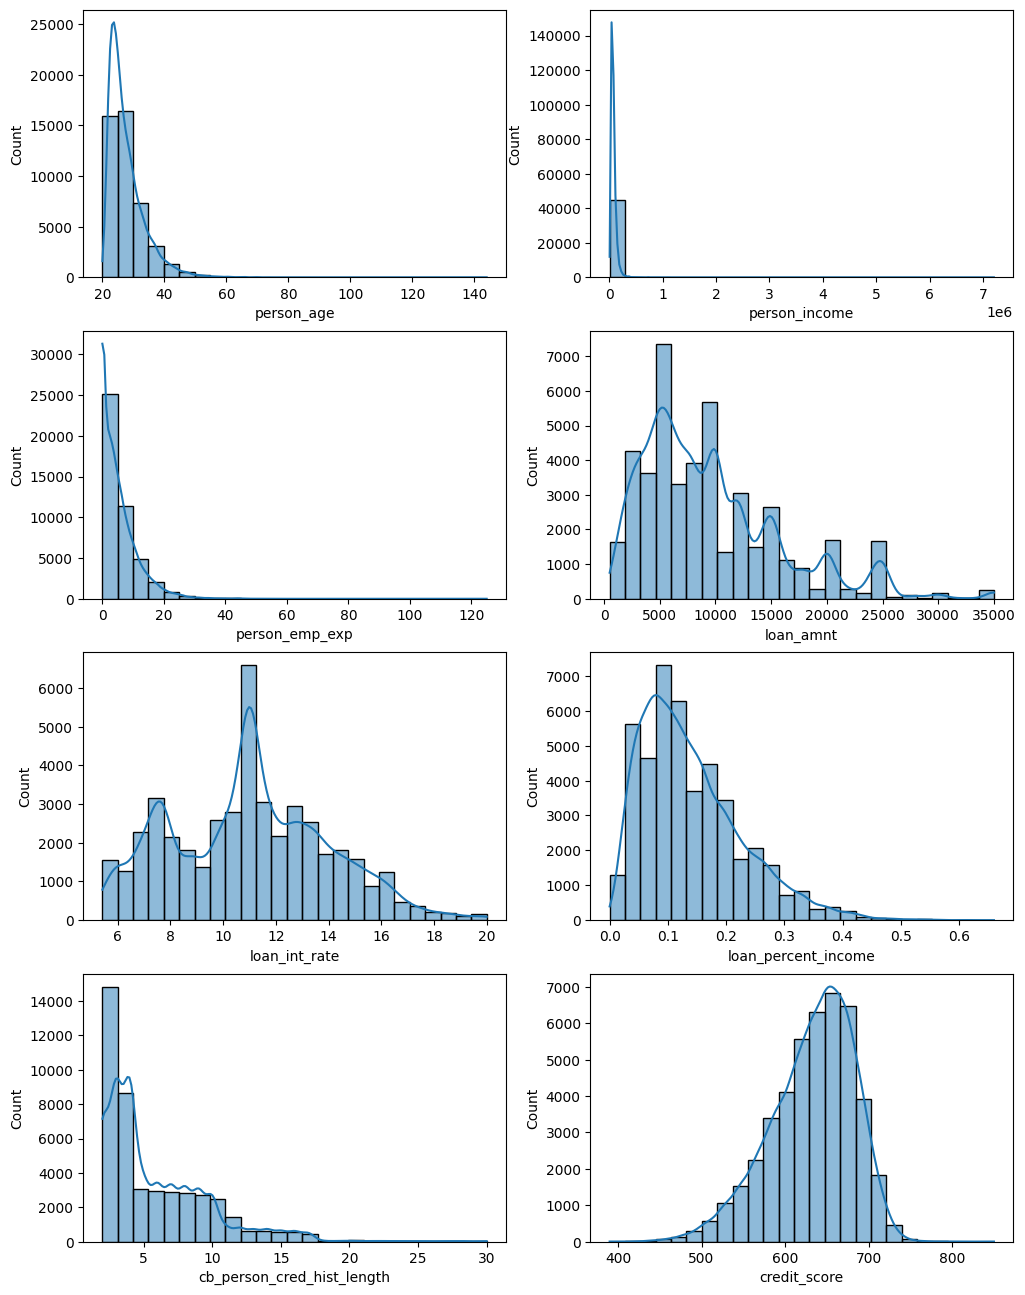

In [84]:
fig, axs = plt.subplots(4, 2, figsize=(12, 16))
axs = axs.flatten() 
    
for i, col in enumerate(data_struct['Numerical']):
    sns.histplot(df[col], bins=25, kde=True, ax=axs[i], legend=False)
    plt.xticks(rotation=0)

fig.tight_layout
plt.show()
        

### 2. Wartości nienumeryczne

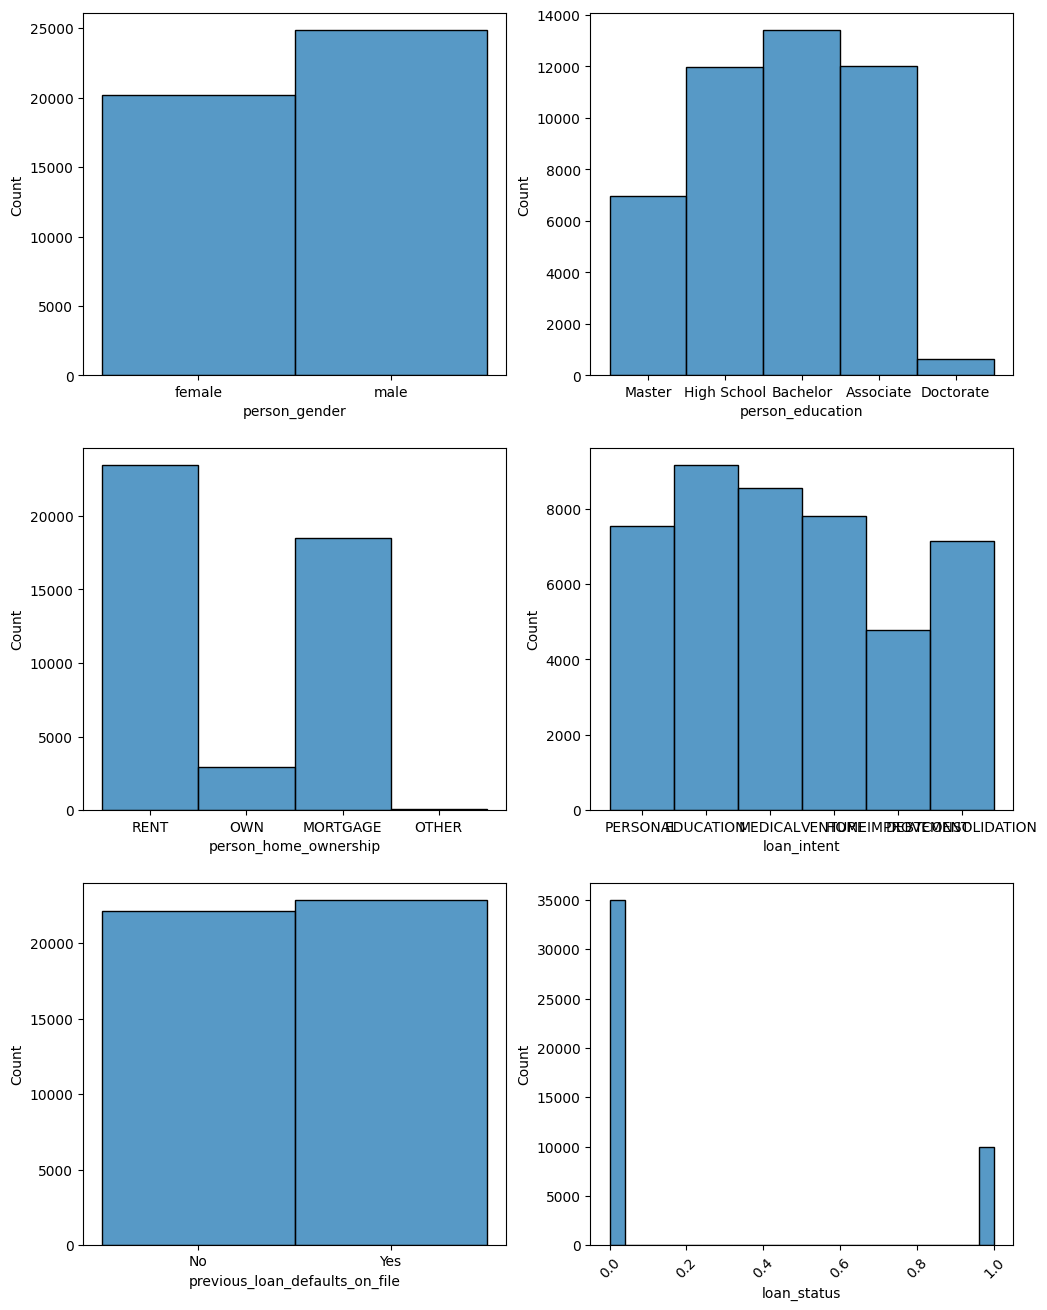

In [88]:
cols = data_struct['Categorical'] + data_struct['Logical']
fig, axs = plt.subplots(3, 2, figsize=(12, 16))
axs = axs.flatten() 
    
for i, col in enumerate(cols):
    sns.histplot(df[col], bins=25, ax=axs[i], legend=False)
    plt.xticks(rotation=45)

fig.tight_layout
plt.show()

## Macierz korelacji

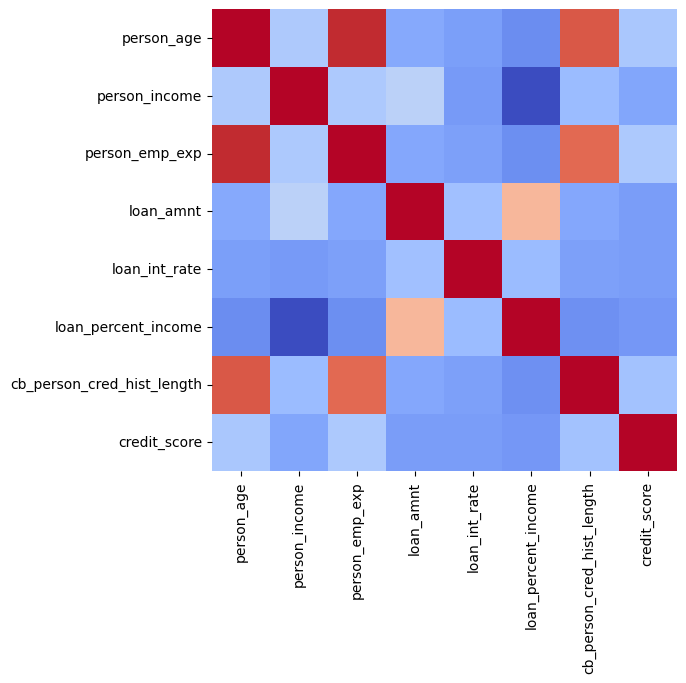

In [ ]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(6,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=False)
plt.show()